In [16]:
# Load the Dataset and Identify the Target Column :
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset(in).csv')

# Display the first few rows and column names to identify the target column
print("First few rows of the dataset:")
print(df.head())

print("\nColumn names in the dataset:")
print(df.columns)


First few rows of the dataset:
   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE       MCH  \
0    -0.741263     -0.791431    -0.465077  -0.824666    -0.966571 -0.604589   
1     1.067467      0.600117     2.951586  -0.484022    -0.238711 -2.904196   
2     0.782760      0.600117     0.032124  -0.504060     0.684427  0.879029   
3     0.615285      0.792055     0.159612  -1.045083     0.151847  0.953210   
4     0.397567      0.264226     0.389089   1.239237     4.013053 -0.307865   

       MCHC       MCV       AGE       SEX    SOURCE  
0 -0.430259 -0.536705 -0.623859 -1.055001  1.229849  
1 -1.553074 -2.836043 -0.486690  0.947867 -0.813108  
2 -0.590661  1.343257  1.067894 -1.055001 -0.813108  
3  0.852957  0.735885 -1.309705 -1.055001 -0.813108  
4 -0.430259 -0.131790 -0.486690  0.947867 -0.813108  

Column names in the dataset:
Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
     

In [10]:
import pandas as pd

# Sample DataFrame
data = {
    'int_column': [1, 2, 3],
    'float_column': [1.1, 2.2, 3.3],
    'object_column': ['a', 'b', 'c']
}

df = pd.DataFrame(data)

# Check dtypes of columns
print(df['int_column'].dtype)  # Output: int64
print(df['float_column'].dtype)  # Output: float64
print(df['object_column'].dtype)  # Output: object


int64
float64
object


In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example DataFrame, replace this with your actual DataFrame
data = {
    'HAEMATOCRIT': [-0.741263, np.nan, 1.067467, 0.782760, 0.615285, np.nan],
    'Sex': ['Male', 'Female', np.nan, 'Male', 'Female', np.nan],
    'HAEMOGLOBINS': [-0.791431, -0.600117, np.nan, 0.600117, 0.792055, np.nan],
    'ERYTHROCYTE': [-0.465077, 2.951586, 0.032124, 0.159612, 0.389089, 0.159612]
}

df = pd.DataFrame(data)

# Assuming 'TreatmentRecommendation' is your target column
target_column = 'ERYTHROCYTE'  # Change this to the actual target column name

# Separate numerical and categorical columns, excluding the target column
numerical_cols = df.select_dtypes(include=[np.number]).columns.difference([target_column])
categorical_cols = df.select_dtypes(include=[object]).columns.difference([target_column])

# Handling missing values
# For numerical columns, use the mean strategy
if not numerical_cols.empty:
    num_imputer = SimpleImputer(strategy='mean')
    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# For categorical columns, use the most frequent strategy
if not categorical_cols.empty:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Encoding categorical variables
label_encoders = {}
for column in categorical_cols:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Verify if any columns still have missing values
print("\nMissing Values After Imputation:")
print(df.isnull().sum())



Missing Values After Imputation:
HAEMATOCRIT     0
Sex             0
HAEMOGLOBINS    0
ERYTHROCYTE     0
dtype: int64


In [2]:
# Feature Scaling :
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [3]:
# Split Data into Features and Target :
# Separate features and target
X = df_scaled.drop(columns=[target_column])
y = df_scaled[target_column]

# Check if X and y are correctly separated
print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)



Features (X) shape: (6, 3)
Target (y) shape: (6,)


In [4]:
# Split Data into Training and Test Sets :

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:

# Example: Combine certain columns to create a new feature
df['BLOOD TEST'] = df['HAEMATOCRIT'] / (df['HAEMOGLOBINS']/100)**2

# Drop columns that are not useful
df.drop(columns=['HAEMATOCRIT', 'HAEMOGLOBINS'], inplace=True)

print("Feature Engineering Completed.")


Feature Engineering Completed.


In [8]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Example DataFrame, replace this with your actual DataFrame
data = {
    'HAEMATOCRIT': [-0.741263, np.nan, 1.067467, 0.782760, 0.615285, np.nan],
    'Sex': ['Male', 'Female', np.nan, 'Male', 'Female', np.nan],
    'HAEMOGLOBINS': [-0.791431, -0.600117, np.nan, 0.600117, 0.792055, np.nan],
    'ERYTHROCYTE': [-0.465077, 2.951586, 0.032124, 0.159612, 0.389089, 0.159612]
}

df = pd.DataFrame(data)

# Assuming 'TreatmentRecommendation' is your target column
target_column = 'ERYTHROCYTE'  # Change this to the actual target column name

# Separate numerical and categorical columns, excluding the target column
numerical_cols = df.select_dtypes(include=[np.number]).columns.difference([target_column])
categorical_cols = df.select_dtypes(include=[object]).columns.difference([target_column])

# Handling missing values
# For numerical columns, use the mean strategy
if not numerical_cols.empty:
    num_imputer = SimpleImputer(strategy='mean')
    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# For categorical columns, use the most frequent strategy
if not categorical_cols.empty:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Encoding categorical variables
label_encoders = {}
for column in categorical_cols:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Verify if any columns still have missing values
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

# Split the data into training and test sets
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

# Predict on the test set
y_pred = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Missing Values After Imputation:
HAEMATOCRIT     0
Sex             0
HAEMOGLOBINS    0
ERYTHROCYTE     0
dtype: int64
Mean Squared Error: 4.055577531298367


In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example DataFrame
data = {
    'HAEMATOCRIT': [-0.741263, np.nan, 1.067467, 0.782760, 0.615285, np.nan],
    'Sex': ['Male', 'Female', np.nan, 'Male', 'Female', np.nan],
    'HAEMOGLOBINS': [-0.791431, -0.600117, np.nan, 0.600117, 0.792055, np.nan],
    'ERYTHROCYTE': [-0.465077, 2.951586, 0.032124, 0.159612, 0.389089, 0.159612]
}

df = pd.DataFrame(data)

# Target column
target_column = 'ERYTHROCYTE'

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.difference([target_column])
categorical_cols = df.select_dtypes(include=[object]).columns.difference([target_column])

# Handling missing values
# For numerical columns, use the mean strategy
if not numerical_cols.empty:
    num_imputer = SimpleImputer(strategy='mean')
    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# For categorical columns, use the most frequent strategy
if not categorical_cols.empty:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Encoding categorical variables
label_encoders = {}
for column in categorical_cols:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Convert the continuous target variable to discrete classes
df[target_column] = pd.cut(df[target_column], bins=3, labels=False)

# Split the data into training and test sets
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5


In [10]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.0


Feature ranking:
1. feature HAEMOGLOBINS (0.0)
2. feature Sex (0.0)
3. feature HAEMATOCRIT (0.0)


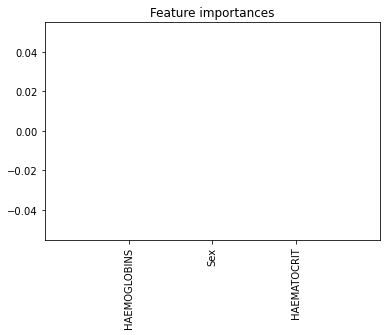

In [12]:
import matplotlib.pyplot as plt

# Feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [13]:
!pip install Flask

In [1]:
!pip install Flask flask-talisman
